# Bellabeat Capstone Project

### Case Study: How Can a Wellness Technology Company Play It Smart?
##### Author: Saba Gul


![alt text](https://miro.medium.com/v2/resize:fit:1400/1*SjEGKrjDp7skk4URhzW5Nw.png "Title")

##  Phase I: Ask
*In the ask phase of your analysis, you wrote a clear statement of the business task. According to the Case Study Roadmap, this statement should 1) identify the specific problem you are trying to solve, and 2) consider key stakeholders.*

### Business Task:
To discern patterns in the utilization of non-Bellabeat smart devices by consumers and integrate these findings into Bellabeat's marketing strategy.

#### Stakeholders:

* Urška Sršen - Bellabeat cofounder and Chief Creative Officer
* Sando Mur - Bellabeat cofounder and key member of Bellabeat executive team
* Bellabeat Marketing Analytics team

## Phase II: Prepare
*In the prepare phase of your analysis, you described the data sources you used. According to the Case Study Roadmap, this description should include where the data is located and how it is organized. It should also consider issues with bias or credibility, problems with the data, and how you verified its integrity. Finally, your description should explain how the data helped you answer your questions.* 


I am set to analyze FitBit Fitness Tracker Data to extract insights into consumers' smart device usage, aligning this with BellaBeat's Time product. The dataset involves 30 FitBit users, granting consent for data collection on physical activity, heartbeat, and sleep. After initial data download, I filtered relevant datasets, focusing on 'daily' data for a holistic understanding of smart device utilization. The dailyActivity_merged dataset consolidates activity-related data, and similarly, sleepDay_merged combines sleep-related data. My analysis will primarily revolve around these two datasets. The data, sourced from original first-party channels, remains unsorted due to its user ID and date organization. Its credibility is reinforced by 2000+ Kaggle upvotes, indicating trustworthiness. However, the absence of gender and age details, coupled with limited scope, introduces potential bias in the analysis.

## Phase III: Process
*In the process phase of your analysis, you documented your data cleaning and manipulation. According to the Case Study Roadmap, this documentation should include a list of the tools you used and why you selected them. In addition, it was an opportunity to explain how you ensured your data’s integrity and confirmed that it was clean and ready to analyze.*

In [28]:
import numpy as np # data arrays
import pandas as pd # data structure and data analysis
import matplotlib as plt # data visualization
import datetime as dt # date time
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# File path for the daily activity data
daily_activity_file_path = "Desktop\\CaseStudy_Data_Analytics\\Fitabase_Data\\dailyActivity_merged.csv"

# File path for the sleep data
sleep_day_file_path = "Desktop\\CaseStudy_Data_Analytics\\Fitabase_Data\\sleepDay_merged.csv"

# File path for hourly steps data
hourly_steps_file_path = "Desktop\\CaseStudy_Data_Analytics\\Fitabase_Data\\hourlySteps_merged.csv"

# Read the CSV files into DataFrames

# Read the daily activity CSV file into a DataFrame
daily_activity = pd.read_csv(daily_activity_file_path)

# Read the sleep day merged CSV file into a DataFrame
sleep_day_merged = pd.read_csv(sleep_day_file_path)

# Read the hourly steps merged CSV file into a DataFrame
hourly_steps_merged = pd.read_csv(hourly_steps_file_path)



In [30]:
# Display the sleep day merged DataFrame
sleep_day_merged.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [31]:
# Display the hourly steps merged DataFrame
hourly_steps_merged.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


In [32]:
# Display the daily activity DataFrame
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [33]:
# Display the first few rows and the internal structure of daily_activity
print(daily_activity.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [34]:
# Display the internal structure of daily_sleep
print(sleep_day_merged.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB
None


In [35]:
# Display the internal structure of hourly_steps
print(hourly_steps_merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   StepTotal     22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB
None


In [36]:
# Calculate the number of unique IDs in the hourlySteps_merged DataFrame
uni_hourlySteps_merged = hourly_steps_merged['Id'].nunique()

# Calculate the number of unique IDs in the daily_activity DataFrame
uni_daily_activity = daily_activity['Id'].nunique()

# Calculate the number of unique IDs in the sleepDay_merged DataFrame
uni_sleepDay_merged = sleep_day_merged['Id'].nunique()

# Print the results
print("Number of unique IDs in daily_activity:", uni_daily_activity)
print("Number of unique IDs in sleep_day_merged:", uni_sleepDay_merged)
print("Number of unique IDs in hourly_steps_merged:", uni_hourlySteps_merged)

Number of unique IDs in daily_activity: 33
Number of unique IDs in sleep_day_merged: 24
Number of unique IDs in hourly_steps_merged: 33


In [37]:
# Count the number of duplicated rows in daily_activity based on all columns
duplicated_count_daily_activity = daily_activity.duplicated().sum()
print("Number of duplicated rows in daily_activity:", duplicated_count_daily_activity)

# Count the number of duplicated rows in sleepDay_merged based on all columns
duplicated_count_daily_sleep =  sleep_day_merged.duplicated().sum()
print("Number of duplicated rows in sleep_day_merged:", duplicated_count_daily_sleep)

# Count the number of duplicated rows in hourlySteps_merged based on all columns
duplicated_count_hourly_steps = hourly_steps_merged.duplicated().sum()
print("Number of duplicated rows in hourly_steps_merged:", duplicated_count_hourly_steps)

Number of duplicated rows in daily_activity: 0
Number of duplicated rows in sleep_day_merged: 3
Number of duplicated rows in hourly_steps_merged: 0


In [38]:
# Remove duplicates and N/A values from daily_sleep
sleep_day_merged = sleep_day_merged.drop_duplicates().dropna()

# Count the number of duplicated rows in sleepDay_merged based on all columns
duplicated_count_daily_sleep = sleep_day_merged.duplicated().sum()
print("Number of duplicated rows in daily_sleep:", duplicated_count_daily_sleep)

Number of duplicated rows in daily_sleep: 0


In [39]:
# Clean and rename columns
sleep_day_merged.columns = sleep_day_merged.columns.str.lower()
sleep_day_merged.info()
hourly_steps_merged.columns=  hourly_steps_merged.columns.str.lower()
hourly_steps_merged.info()
daily_activity.columns= daily_activity.columns.str.lower()
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 410 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  410 non-null    int64 
 1   sleepday            410 non-null    object
 2   totalsleeprecords   410 non-null    int64 
 3   totalminutesasleep  410 non-null    int64 
 4   totaltimeinbed      410 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 19.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            22099 non-null  int64 
 1   activityhour  22099 non-null  object
 2   steptotal     22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null

In [40]:
sleep_day_merged.head()


,id,sleepday,totalsleeprecords,totalminutesasleep,totaltimeinbed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [41]:
hourly_steps_merged.head()


,id,activityhour,steptotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


In [42]:
daily_activity.head()

,id,activitydate,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [43]:
# Rename and convert 'activitydate' column to datetime in daily_activity
daily_activity = daily_activity.rename(columns={'activitydate': 'date'})
daily_activity['date'] = pd.to_datetime(daily_activity['date'], format='%m/%d/%Y')

# Rename and convert 'sleepday' column to datetime in daily_sleep
sleep_day_merged = sleep_day_merged.rename(columns={'sleepday': 'date'})
sleep_day_merged['date'] = pd.to_datetime(sleep_day_merged['date'], format="%m/%d/%Y %I:%M:%S %p")

In [44]:
sleep_day_merged.head()

,id,date,totalsleeprecords,totalminutesasleep,totaltimeinbed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712


In [45]:
daily_activity.head()

,id,date,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [46]:
#For our hourly_steps dataset we will convert date string to date-time

hourly_steps_merged= hourly_steps_merged.rename(columns={'activityhour':'date_time'})
hourly_steps_merged ['date_time'] = pd.to_datetime(hourly_steps_merged['date_time'], format="%m/%d/%Y %I:%M:%S %p")

In [47]:
hourly_steps_merged.head()

,id,date_time,steptotal
0,1503960366,2016-04-12 00:00:00,373
1,1503960366,2016-04-12 01:00:00,160
2,1503960366,2016-04-12 02:00:00,151
3,1503960366,2016-04-12 03:00:00,0
4,1503960366,2016-04-12 04:00:00,0


In [48]:
# Merge daily_activity and daily_sleep on columns 'id' and 'date'
daily_activity_sleep = pd.merge(daily_activity, sleep_day_merged, on=['id', 'date'])

# Display the information about the merged DataFrame
print(daily_activity_sleep.info())
daily_activity_sleep.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        410 non-null    int64         
 1   date                      410 non-null    datetime64[ns]
 2   totalsteps                410 non-null    int64         
 3   totaldistance             410 non-null    float64       
 4   trackerdistance           410 non-null    float64       
 5   loggedactivitiesdistance  410 non-null    float64       
 6   veryactivedistance        410 non-null    float64       
 7   moderatelyactivedistance  410 non-null    float64       
 8   lightactivedistance       410 non-null    float64       
 9   sedentaryactivedistance   410 non-null    float64       
 10  veryactiveminutes         410 non-null    int64         
 11  fairlyactiveminutes       410 non-null    int64         
 12  lightlyactiveminutes  

,id,date,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,totalsleeprecords,totalminutesasleep,totaltimeinbed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,327,346
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,384,407
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1,412,442
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2,340,367
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,1,700,712


## Step IV: Analyze
*In the analyze phase of your analysis, you wrote a summary of your analysis. According to the Case Study Roadmap, this summary should discuss organizing and formatting your data. In addition, it should detail any surprises, trends, or relationships you discovered. Lastly, you should summarize how these insights helped you answer your questions.*


### Classification of Physical Activity based on Step count Per Day
![alt text](https://allthestuff.com/wp-content/uploads/recommendedsteps.jpg)

In [49]:
#Group by 'id' and calculate the mean for specific columns
daily_average = daily_activity_sleep.groupby('id').agg(
    mean_daily_steps=pd.NamedAgg(column='totalsteps', aggfunc='mean'),
    mean_daily_calories=pd.NamedAgg(column='calories', aggfunc='mean'),
    mean_daily_sleep=pd.NamedAgg(column='totalminutesasleep', aggfunc='mean')
).reset_index()

# Display the first few rows of the resulting DataFrame
daily_average.head()

,id,mean_daily_steps,mean_daily_calories,mean_daily_sleep
0,1503960366,12405.680000,1872.280000,360.280000
1,1644430081,7967.750000,2977.750000,294.000000
2,1844505072,3477.000000,1676.333333,652.000000
3,1927972279,1490.000000,2316.200000,417.000000
4,2026352035,5618.678571,1540.785714,506.178571


In [83]:
# Define a function to categorize user types
def categorize_user_type(steps):
    if steps < 5000:
        return "sedentary"
    elif 5000 <= steps < 7500:
        return "lightly active"
    elif 7500 <= steps < 10000:
        return "active"
    else:
        return "very active"

# Apply the function to create a new 'user_type' column
daily_average['user_type'] = daily_average['mean_daily_steps'].apply(categorize_user_type)

# Display the first few rows of the resulting DataFrame
daily_average

,id,mean_daily_steps,mean_daily_calories,mean_daily_sleep,user_type
0,1503960366,12405.680000,1872.280000,360.280000,very active
1,1644430081,7967.750000,2977.750000,294.000000,active
2,1844505072,3477.000000,1676.333333,652.000000,sedentary
3,1927972279,1490.000000,2316.200000,417.000000,sedentary
4,2026352035,5618.678571,1540.785714,506.178571,lightly active
5,2320127002,5079.000000,1804.000000,61.000000,lightly active
6,2347167796,8533.200000,1971.333333,446.800000,active
7,3977333714,11218.000000,1560.392857,293.642857,very active
8,4020332650,6596.750000,3195.000000,349.375000,lightly active
9,4319703577,7125.423077,2024.692308,476.653846,lightly active


In [84]:
# Group by 'user_type' and calculate counts
totals = daily_average['user_type'].value_counts().reset_index()
totals.columns = ['user_type', 'total'] # rename count to total

# Calculate the total count
totals['totals'] = totals['total'].sum()

# Calculate the percentage
totals['total_percent'] = totals['total'] / totals['totals']

# Convert the percentage to formatted strings
totals['percentage'] = (totals['total_percent'] * 100).map("{:.2f}%".format)

# Display the result
print(totals)



        user_type  total  totals  total_percent percentage
0          active      9      24       0.375000     37.50%
1     very active      5      24       0.208333     20.83%
2       sedentary      5      24       0.208333     20.83%
3  lightly active      5      24       0.208333     20.83%


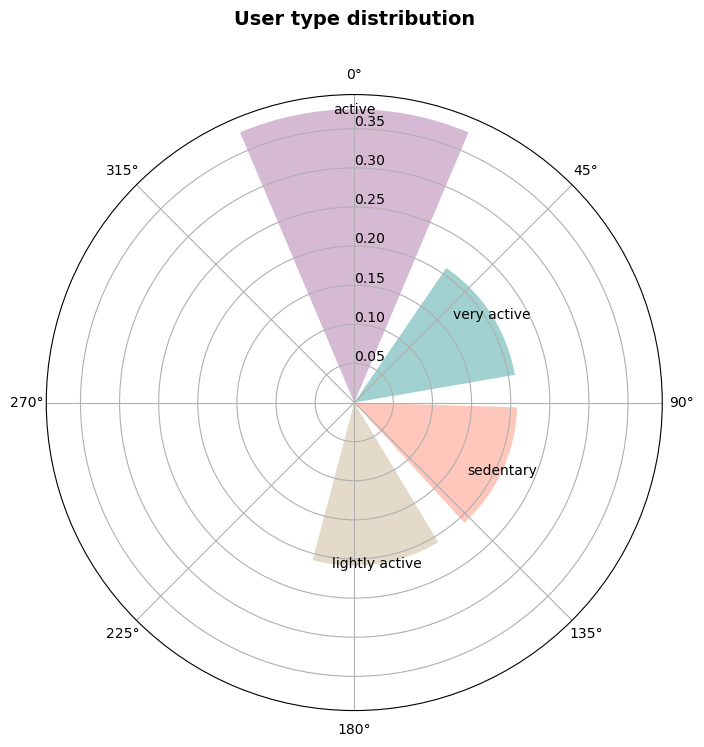

In [52]:
# Specify colors
colors = ["#d6bad4", "#a0d0d0", "#ffc6bc", "#e3dac9"]

# Plotting
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
bars = ax.bar(totals.index, totals['total_percent'], color=colors)

# Formatting
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)



# Adding data labels
for bar, label in zip(bars, totals['user_type']):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), label,
            ha='center', va='center', color='black', size=10)

# Adding a title
plt.title("User type distribution", size=14, weight='bold', y=1.1)

plt.show()

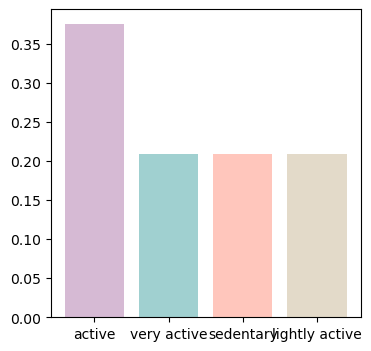

In [53]:
# Specify colors
colors = ["#d6bad4", "#a0d0d0", "#ffc6bc", "#e3dac9"]

# Plotting
fig, ax = plt.subplots(figsize=(4, 4))
bars = ax.bar(totals['user_type'], totals['total_percent'], color=colors)

In [54]:
# Assuming daily_activity_sleep is your DataFrame
# Replace 'date', 'totalsteps', and 'totalminutesasleep' with your actual column names

# Convert 'date' to datetime
daily_activity_sleep['date'] = pd.to_datetime(daily_activity_sleep['date'])

# Extract weekday from the date
daily_activity_sleep['weekday'] = daily_activity_sleep['date'].dt.day_name()

# Set the order of weekdays
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_activity_sleep['weekday'] = pd.Categorical(daily_activity_sleep['weekday'], categories=weekday_order, ordered=True)

# Group by weekday and calculate mean
weekday_steps_sleep = daily_activity_sleep.groupby('weekday').agg(
    daily_steps=pd.NamedAgg(column='totalsteps', aggfunc='mean'),
    daily_sleep=pd.NamedAgg(column='totalminutesasleep', aggfunc='mean')
).reset_index()

# Display the result
weekday_steps_sleep.head()


C:\Users\Saba Gul\AppData\Local\Temp\ipykernel_1648\3960599424.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_steps_sleep = daily_activity_sleep.groupby('weekday').agg(


,weekday,daily_steps,daily_sleep
0,Monday,9273.217391,419.500000
1,Tuesday,9182.692308,404.538462
2,Wednesday,8022.863636,434.681818
3,Thursday,8183.515625,401.296875
4,Friday,7901.403509,405.421053


C:\Users\Saba Gul\AppData\Local\Temp\ipykernel_1648\3770234551.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(weekday_steps_sleep['weekday'], rotation=45, ha='right')
C:\Users\Saba Gul\AppData\Local\Temp\ipykernel_1648\3770234551.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(weekday_steps_sleep['weekday'], rotation=45, ha='right')


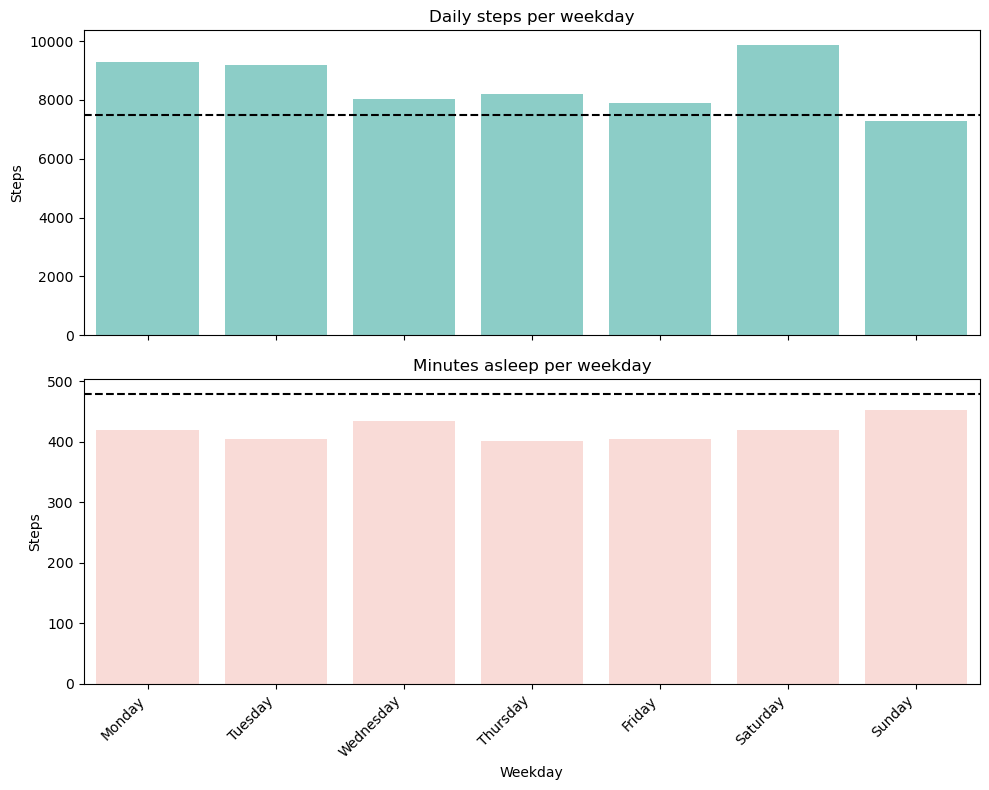

In [55]:
# Assuming weekday_steps_sleep is your DataFrame
# Replace 'weekday', 'daily_steps', and 'daily_sleep' with your actual column names

# Set the color palette
sns.set_palette(["#006699", "#85e0e0"])

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot for daily steps
sns.barplot(x='weekday', y='daily_steps', data=weekday_steps_sleep, color='#81d8d0', ax=axs[0])
axs[0].axhline(y=7500, color='black', linestyle='--')
axs[0].set(title='Daily steps per weekday', xlabel='Weekday', ylabel='Steps')

# Plot for minutes asleep
sns.barplot(x='weekday', y='daily_sleep', data=weekday_steps_sleep, color='#ffd7d1', ax=axs[1])
axs[1].axhline(y=480, color='black', linestyle='--')
axs[1].set(title='Minutes asleep per weekday', xlabel='Weekday', ylabel='Steps')

# Adjust the rotation of x-axis labels
for ax in axs:
    ax.set_xticklabels(weekday_steps_sleep['weekday'], rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [56]:
hourly_steps_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         22099 non-null  int64         
 1   date_time  22099 non-null  datetime64[ns]
 2   steptotal  22099 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 518.1 KB


In [57]:
hourly_steps_merged.head()

,id,date_time,steptotal
0,1503960366,2016-04-12 00:00:00,373
1,1503960366,2016-04-12 01:00:00,160
2,1503960366,2016-04-12 02:00:00,151
3,1503960366,2016-04-12 03:00:00,0
4,1503960366,2016-04-12 04:00:00,0


In [58]:
# Assuming hourly_steps is your DataFrame
# Replace 'date_time' with your actual column name

# Convert 'date_time' to string
hourly_steps_merged['date_time'] = hourly_steps_merged['date_time'].astype(str)

# Separate 'date_time' into 'date' and 'time'
hourly_steps_merged[['date', 'time']] = hourly_steps_merged['date_time'].str.split(' ', expand=True)

# Convert 'date' to datetime format
hourly_steps_merged['date'] = pd.to_datetime(hourly_steps_merged['date'])

# Display the first few rows of the resulting DataFrame
hourly_steps_merged.head()

,id,date_time,steptotal,date,time
0,1503960366,2016-04-12 00:00:00,373,2016-04-12,00:00:00
1,1503960366,2016-04-12 01:00:00,160,2016-04-12,01:00:00
2,1503960366,2016-04-12 02:00:00,151,2016-04-12,02:00:00
3,1503960366,2016-04-12 03:00:00,0,2016-04-12,03:00:00
4,1503960366,2016-04-12 04:00:00,0,2016-04-12,04:00:00


In [59]:
hourly_steps_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         22099 non-null  int64         
 1   date_time  22099 non-null  object        
 2   steptotal  22099 non-null  int64         
 3   date       22099 non-null  datetime64[ns]
 4   time       22099 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 863.4+ KB


In [60]:
hourly_steps= hourly_steps_merged.groupby('time').agg(
sum_steps_per_hour=pd.NamedAgg(column='steptotal', aggfunc='sum')).reset_index()
hourly_steps.head()

,time,sum_steps_per_hour
0,00:00:00,39404
1,01:00:00,21555
2,02:00:00,15964
3,03:00:00,5996
4,04:00:00,11836


C:\Users\Saba Gul\AppData\Local\Temp\ipykernel_1648\2919097080.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hourly_steps, x='time', y='sum_steps_per_hour',  palette=colors, estimator="sum", errorbar=None)


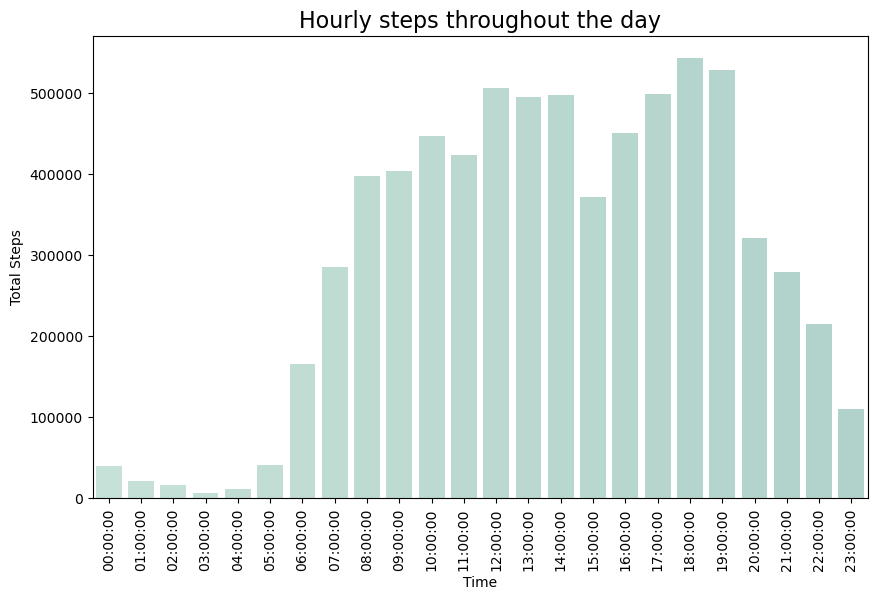

In [61]:
# Assuming hourly_steps_avg is your DataFrame
# Replace 'time' and 'steptotal' with your actual column names

# Group by 'time' and calculate the sum of 'steps per hour'
hourly_steps_sum = hourly_steps.groupby('time')['sum_steps_per_hour'].sum().reset_index()

# Set the color palette
cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
# Create a list of colors from the colormap
colors = [cmap(i) for i in range(len(hourly_steps))]

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=hourly_steps, x='time', y='sum_steps_per_hour',  palette=colors, estimator="sum", errorbar=None)
#ax.bar_label(ax.containers[0], fontsize=10);
# Adding title and labels
plt.title("Hourly steps throughout the day", fontsize=16)
plt.xlabel("Time")
plt.ylabel("Total Steps")

# Adjust the rotation of x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()

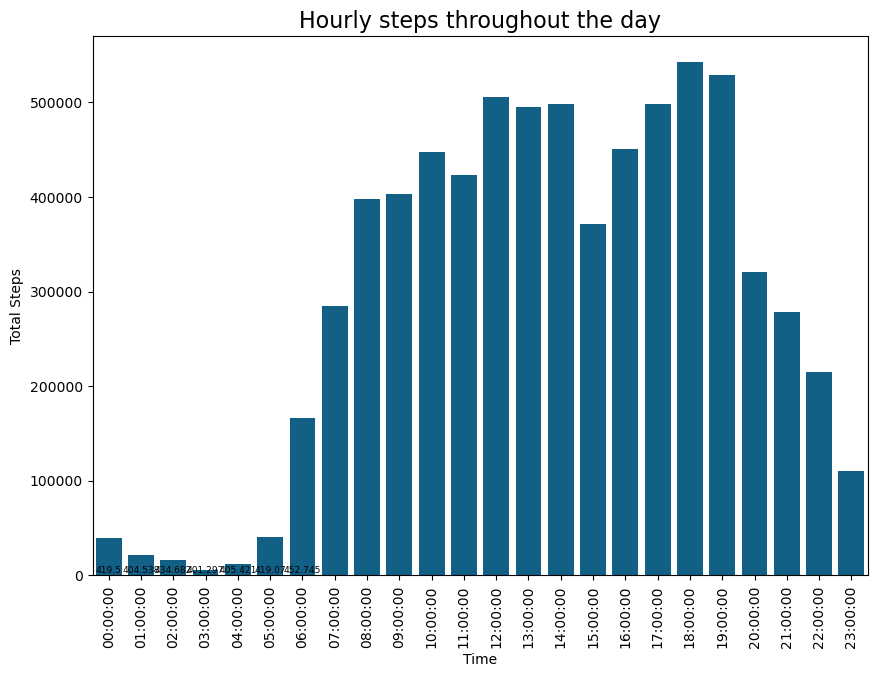

In [62]:
plt.figure(figsize=(10, 7))
plt.xlabel("Time")
plt.ylabel("Total Steps")
plt.title("Hourly steps throughout the day", fontsize=16)
# Adjust the rotation of x-axis labels
plt.xticks(rotation=90)
sns.barplot(x='time', y='sum_steps_per_hour', data=hourly_steps, estimator="sum", errorbar=None).bar_label(ax.containers[0], fontsize=6.5);



In [63]:
# Assuming daily_activity_sleep is your DataFrame
# Replace 'id' with your actual column name for user IDs

# Group by 'id' and calculate the sum of days used
daily_use = daily_activity_sleep.groupby('id').size().reset_index(name='days_used')

# Define a function to categorize usage
def categorize_usage(days_used):
    if 1 <= days_used <= 10:
        return "Low use"
    elif 11 <= days_used <= 20:
        return "Moderate use"
    elif 21 <= days_used <= 31:
        return "High use"
    else:
        return "Unknown use"

# Apply the categorize_usage function to create the 'usage' column
daily_use['usage'] = daily_use['days_used'].apply(categorize_usage)

# Display the head of the resulting DataFrame
daily_use.head(6)

,id,days_used,usage
0,1503960366,25,High use
1,1644430081,4,Low use
2,1844505072,3,Low use
3,1927972279,5,Low use
4,2026352035,28,High use
5,2320127002,1,Low use


In [64]:
# Assuming daily_use is your DataFrame
# Replace 'usage' with your actual column name for usage categories

# Group by 'usage' and calculate the total number of occurrences
daily_use_percent = daily_use.groupby('usage').size().reset_index(name='total')

# Calculate the total number of records
totals = daily_use_percent['total'].sum()

# Calculate the percentage of each category
daily_use_percent['total_percent'] = daily_use_percent['total'] / totals

# Format the percentage values
daily_use_percent['labels'] = (daily_use_percent['total_percent'] * 100).map('{:.0f}%'.format)

# Display the head of the resulting DataFrame
daily_use_percent.head()

,usage,total,total_percent,labels
0,High use,12,0.500,50%
1,Low use,9,0.375,38%
2,Moderate use,3,0.125,12%


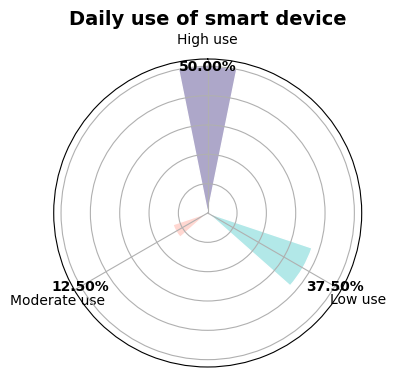

In [65]:
# Extract data for plotting
labels = daily_use_percent['usage']
values = daily_use_percent['total_percent']

# Set colors for each category
colors = ["#ada7c9", "#b2e8e8", "#ffd7d1"]

# Plotting
fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(projection='polar'))
ax.bar(np.arange(len(labels)) * 2 * np.pi / len(labels), values, color=colors, width=0.4, edgecolor='white')

# Customize the plot
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xticks(np.arange(len(labels)) * 2 * np.pi / len(labels))
ax.set_xticklabels(labels)
ax.set_yticklabels([])  # Hide y-axis labels
ax.set_title("Daily use of smart device", size=14, weight='bold')

# Add percentage labels
for i, (label, value) in enumerate(zip(labels, values)):
    angle = i * 2 * np.pi / len(labels)
    ax.text(angle, 0.5, f"{value:.2%}", ha='center', va='center', color='black', fontweight='bold')

plt.show()

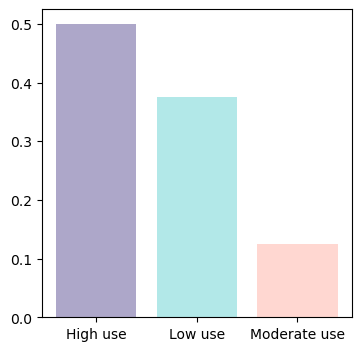

In [66]:
# Specify colors
colors = ["#ada7c9", "#b2e8e8", "#ffd7d1"]

# Plotting
fig, ax = plt.subplots(figsize=(4, 4))
bars = ax.bar(daily_use_percent['usage'], daily_use_percent['total_percent'], color=colors)

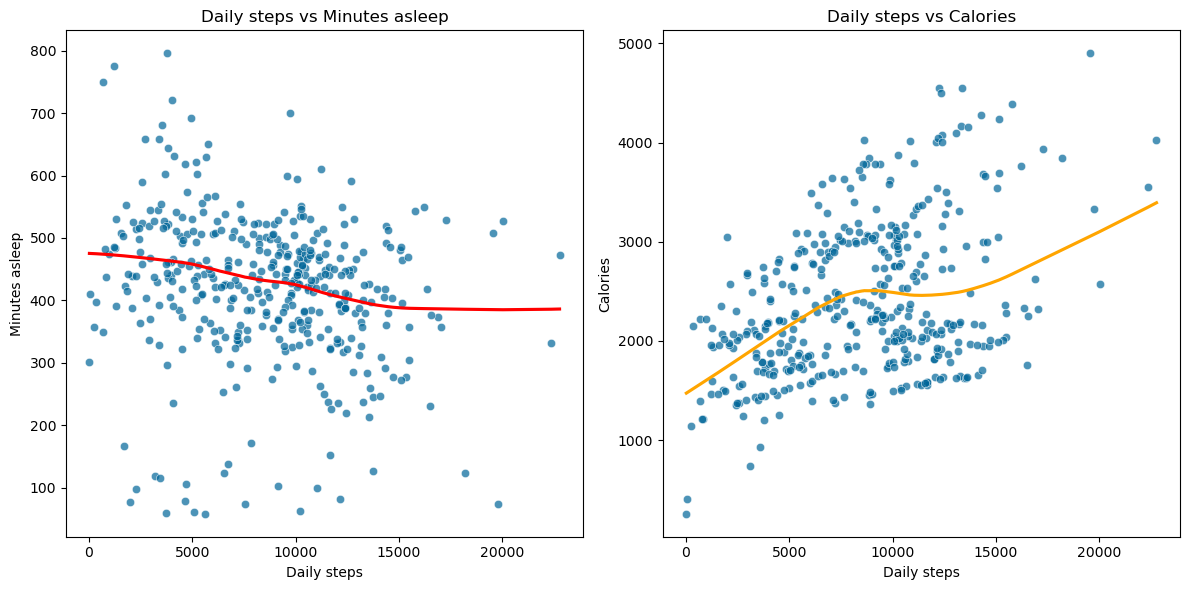

In [67]:
# Plot 1: 'Daily steps vs Minutes asleep'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=daily_activity_sleep, x='totalsteps', y='totalminutesasleep', alpha=0.7)
sns.regplot(data=daily_activity_sleep, x='totalsteps', y='totalminutesasleep', scatter=False, color='red', lowess=True)
plt.title('Daily steps vs Minutes asleep')
plt.xlabel('Daily steps')
plt.ylabel('Minutes asleep')

# Plot 2: 'Daily steps vs Calories'
plt.subplot(1, 2, 2)
sns.scatterplot(data=daily_activity_sleep, x='totalsteps', y='calories', alpha=0.7)
sns.regplot(data=daily_activity_sleep, x='totalsteps', y='calories', scatter=False, color='orange', lowess=True)
plt.title('Daily steps vs Calories')
plt.xlabel('Daily steps')
plt.ylabel('Calories')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [68]:
daily_use_merged = pd.merge(daily_activity, daily_use, on='id')

# Display the head of the merged DataFrame
daily_use_merged.head()

,id,date,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,days_used,usage
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,25,High use
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,25,High use
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,25,High use
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,25,High use
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,25,High use


In [69]:
# Assuming daily_use_merged is your DataFrame
# Replace 'veryactiveminutes', 'fairlyactiveminutes', 'lightlyactiveminutes', 'sedentaryminutes' with your actual column names

# Calculate total minutes worn
daily_use_merged['total_minutes_worn'] = (
    daily_use_merged['veryactiveminutes'] +
    daily_use_merged['fairlyactiveminutes'] +
    daily_use_merged['lightlyactiveminutes'] +
    daily_use_merged['sedentaryminutes']
)

# Calculate percent minutes worn
daily_use_merged['percent_minutes_worn'] = (daily_use_merged['total_minutes_worn'] / 1440) * 100


# Assign worn categories
daily_use_merged['worn'] = pd.cut(
    daily_use_merged['percent_minutes_worn'],
    bins=[-1, 50, 100],  # Adjusted bins to include 0
    labels=["Less than half day", "More than half day"]
)

# Add 'All day' to the category list
daily_use_merged['worn'] = pd.Categorical(
    daily_use_merged['worn'],
    categories=["Less than half day", "More than half day", "All day"],
    ordered=True
)

# For values equal to 100, set 'All day'
daily_use_merged.loc[daily_use_merged['percent_minutes_worn'] == 100, 'worn'] = "All day"

In [70]:
daily_use_merged.head()

,id,date,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,days_used,usage,total_minutes_worn,percent_minutes_worn,worn
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,25,High use,1094,75.972222,More than half day
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,25,High use,1033,71.736111,More than half day
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,25,High use,1440,100.000000,All day
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,25,High use,998,69.305556,More than half day
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,25,High use,1040,72.222222,More than half day


In [71]:
# Assuming 'minutes_worn' is your DataFrame
# Replace 'usage' with your actual column name

# Calculate total counts and percentages for all users
minutes_worn_percent = (
    daily_use_merged.groupby('worn')['worn']
    .agg(total='count')
    .reset_index()
)

# Calculate totals
minutes_worn_percent['totals'] = minutes_worn_percent['total'].sum()

# Calculate percentages
minutes_worn_percent['total_percent'] = minutes_worn_percent['total'] / minutes_worn_percent['totals']

# Format percentages as labels
minutes_worn_percent['labels'] = (minutes_worn_percent['total_percent'] * 100).map('{:.0f}%'.format)

minutes_worn_percent.head()

C:\Users\Saba Gul\AppData\Local\Temp\ipykernel_1648\2296411947.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_use_merged.groupby('worn')['worn']


,worn,total,totals,total_percent,labels
0,Less than half day,25,713,0.035063,4%
1,More than half day,428,713,0.600281,60%
2,All day,260,713,0.364656,36%


In [72]:
# Assuming minutes_worn is your DataFrame
# Replace 'usage' with your actual column name

# Calculate total counts and percentages for all users
minutes_worn_percent = (
    daily_use_merged.groupby('worn')['worn']
    .agg(total='count')
    .reset_index()
)

minutes_worn_percent['totals'] = minutes_worn_percent['total'].sum()
minutes_worn_percent['total_percent'] = minutes_worn_percent['total'] / minutes_worn_percent['totals']
minutes_worn_percent['labels'] = (minutes_worn_percent['total_percent'] * 100).map('{:.0f}%'.format)


# Display 
minutes_worn_percent.head()


C:\Users\Saba Gul\AppData\Local\Temp\ipykernel_1648\2851641345.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_use_merged.groupby('worn')['worn']


,worn,total,totals,total_percent,labels
0,Less than half day,25,713,0.035063,4%
1,More than half day,428,713,0.600281,60%
2,All day,260,713,0.364656,36%


In [73]:
# Filter and calculate for 'high use'
minutes_worn_highuse = (
    daily_use_merged[daily_use_merged['usage'] == 'High use']
    .groupby('worn')['worn']
    .agg(total='count')
    .reset_index()
)

minutes_worn_highuse['totals'] = minutes_worn_highuse['total'].sum()
minutes_worn_highuse['total_percent'] = minutes_worn_highuse['total'] / minutes_worn_highuse['totals']
minutes_worn_highuse['labels'] = (minutes_worn_highuse['total_percent'] * 100).map('{:.0f}%'.format)



C:\Users\Saba Gul\AppData\Local\Temp\ipykernel_1648\3364109748.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('worn')['worn']


In [74]:
minutes_worn_highuse.head()


,worn,total,totals,total_percent,labels
0,Less than half day,16,370,0.043243,4%
1,More than half day,329,370,0.889189,89%
2,All day,25,370,0.067568,7%


In [75]:
# Filter and calculate for 'moderate use'
minutes_worn_moduse = (
    daily_use_merged[daily_use_merged['usage'] == 'Moderate use']
    .groupby('worn')['worn']
    .agg(total='count')
    .reset_index()
)

minutes_worn_moduse['totals'] = minutes_worn_moduse['total'].sum()
minutes_worn_moduse['total_percent'] = minutes_worn_moduse['total'] / minutes_worn_moduse['totals']
minutes_worn_moduse['labels'] = (minutes_worn_moduse['total_percent'] * 100).map('{:.0f}%'.format)



C:\Users\Saba Gul\AppData\Local\Temp\ipykernel_1648\1708920559.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('worn')['worn']


In [76]:
minutes_worn_moduse.head()


,worn,total,totals,total_percent,labels
0,Less than half day,3,75,0.040000,4%
1,More than half day,52,75,0.693333,69%
2,All day,20,75,0.266667,27%


In [77]:
# Filter and calculate for 'low use'
minutes_worn_lowuse = (
    daily_use_merged[daily_use_merged['usage'] == 'Low use']
    .groupby('worn')['worn']
    .agg(total='count')
    .reset_index()
)

minutes_worn_lowuse['totals'] = minutes_worn_lowuse['total'].sum()
minutes_worn_lowuse['total_percent'] = minutes_worn_lowuse['total'] / minutes_worn_lowuse['totals']
minutes_worn_lowuse['labels'] = (minutes_worn_lowuse['total_percent'] * 100).map('{:.0f}%'.format)




C:\Users\Saba Gul\AppData\Local\Temp\ipykernel_1648\426931188.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('worn')['worn']


In [78]:
minutes_worn_lowuse.head()

,worn,total,totals,total_percent,labels
0,Less than half day,6,268,0.022388,2%
1,More than half day,47,268,0.175373,18%
2,All day,215,268,0.802239,80%


In [79]:
# Set factor levels
levels = ["All day", "More than half day", "Less than half day"]
minutes_worn_highuse['worn'] = pd.Categorical(minutes_worn_highuse['worn'], categories=levels, ordered=True)
minutes_worn_percent['worn'] = pd.Categorical(minutes_worn_percent['worn'], categories=levels, ordered=True)
minutes_worn_moduse['worn'] = pd.Categorical(minutes_worn_moduse['worn'], categories=levels, ordered=True)
minutes_worn_lowuse['worn'] = pd.Categorical(minutes_worn_lowuse['worn'], categories=levels, ordered=True)

In [80]:
minutes_worn_lowuse.head()

,worn,total,totals,total_percent,labels
0,Less than half day,6,268,0.022388,2%
1,More than half day,47,268,0.175373,18%
2,All day,215,268,0.802239,80%


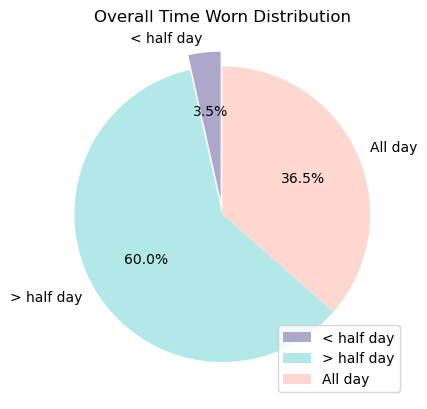

In [81]:
# Assuming 'df' is your DataFrame with columns 'worn', 'total', 'totals', 'total_percent', 'labels'
df = pd.DataFrame({
    'worn': ['< half day', '> half day', 'All day'],
    'total': [25, 428, 260],
    'totals': [713, 713, 713],
    'total_percent': [0.035063, 0.600281, 0.364656],
    'labels': ['4%', '60%', '36%']
})

# Plotting the pie chart
colors = ["#ada7c9", "#b2e8e8", "#ffd7d1"]
explode = (0.1, 0, 0)  # explode the 1st slice

plt.pie(df['total_percent'], labels=df['worn'], autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
plt.title('Overall Time Worn Distribution')
plt.legend( loc ="lower right")
plt.show()

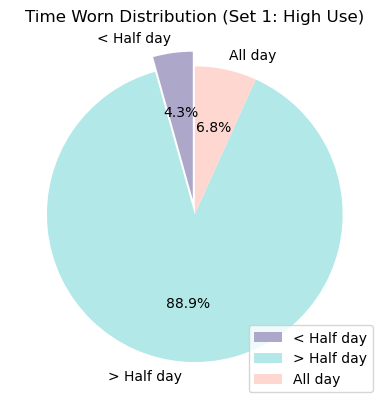

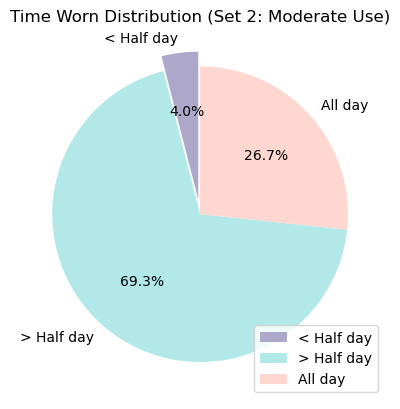

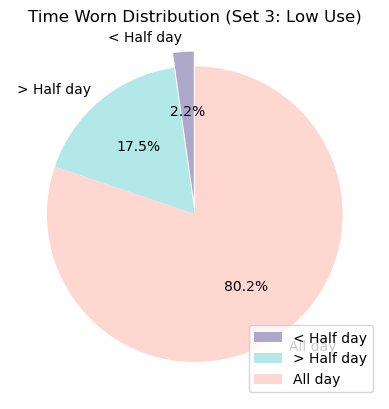

In [82]:
# Data for the first set
data1 = {
    'worn': ['< Half day', '> Half day', 'All day'],
    'total': [16, 329, 25],
    'totals': [370, 370, 370],
    'total_percent': [0.043243, 0.889189, 0.067568],
    'labels': ['4%', '89%', '7%']
}

# Data for the second set
data2 = {
    'worn': ['< Half day', '> Half day', 'All day'],
    'total': [3, 52, 20],
    'totals': [75, 75, 75],
    'total_percent': [0.04, 0.693333, 0.266667],
    'labels': ['4%', '69%', '27%']
}

# Data for the third set
data3 = {
    'worn': ['< Half day', '> Half day', 'All day'],
    'total': [6, 47, 215],
    'totals': [268, 268, 268],
    'total_percent': [0.022388, 0.175373, 0.802239],
    'labels': ['2%', '18%', '80%']
}

# Function to plot pie chart
def plot_pie_chart(data, title):
    colors = ["#ada7c9", "#b2e8e8", "#ffd7d1"]
    explode = (0.1, 0, 0)  # explode the 1st slice

    plt.pie(data['total_percent'], labels=data['worn'], autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
    plt.title(title)
    plt.legend( loc ="lower right")
  
    plt.show()

# Plotting pie charts for each set of data
plot_pie_chart(data1, 'Time Worn Distribution (Set 1: High Use)')
plot_pie_chart(data2, 'Time Worn Distribution (Set 2: Moderate Use)')
plot_pie_chart(data3, 'Time Worn Distribution (Set 3: Low Use)')

## Phase V: Share
*In the share phase of your analysis, you created data visualizations to support your key findings. According to the Case Study Roadmap, these visualizations should reflect your findings, data story, and audience — while keeping accessibility top of mind. Take a moment to review your visualizations now.*

### Conclusion:

After a comprehensive analysis (in Python, R and Excel) of the collected data, several key insights have emerged, shaping our understanding of participants' behaviors and habits:

1. **Insufficient Exercise Levels:**
   The predominant finding indicates that participants are consistently engaging in significantly lower levels of physical activity than recommended for maintaining a healthy lifestyle. This underscores the importance of addressing sedentary behavior and encouraging more active routines.

2. **Stagnant Activity Levels:**
   Notably, the study reveals that activity levels remained relatively constant throughout the observation period. This suggests that merely having a tracking device, such as a watch, to monitor and report activity may not be sufficient to instigate meaningful changes in individuals' exercise habits. Further strategies or interventions may be necessary to motivate increased physical activity.

3. **Negative Correlation Between Sleep and Sedentary Behavior:**
   A notable observation is the strong negative correlation between the amount of sleep individuals receive and the recorded sedentary minutes. This finding suggests that individuals who get more sleep tend to engage in fewer sedentary activities. This correlation underscores the interconnectedness of sleep quality and physical activity levels.



## Phase VI: Act
*In the act phase of your analysis, you provided recommendations based on the final conclusion from your analysis. You were also asked what additional data you could analyze to enhance your work.*


Following a thorough analysis of the data in EXCEL, Python and R, I would like to propose strategic marketing recommendations for BellaBeat, particularly focusing on the promotion of our Time product. The insights derived from the data present opportunities to position BellaBeat as a catalyst for fostering a more active and healthier lifestyle.

**Promoting Increased Physical Activity:**

* The data underscores a prevalent issue of insufficient physical activity among users. BellaBeat's marketing strategy can accentuate the Time product as a solution to this widespread concern.
* Highlighting the sedentary behavior observed in the dataset, the marketing team can craft messaging around how Time's reminders effectively combat prolonged periods of inactivity.

**Optimizing Reminder Frequency:**

* Considering the negative impact on daily calories and steps after approximately 1000 sedentary minutes, the marketing team should emphasize that Time's reminders are strategically spaced. This ensures users are not at risk of exceeding the 1000-minute sedentary threshold each day.
* Incorporate this metric into advertising materials, illustrating how Time's intelligent reminders actively contribute to users' overall physical well-being.

**Holistic Approach to Well-being:**

* Leverage the combined data to advocate for a comprehensive well-being approach. In addition to addressing sedentary behavior, BellaBeat's Time product can incorporate reminders to encourage users to achieve 6-8 hours of quality sleep daily.
* Communicate this holistic approach in marketing campaigns, showcasing how Time goes beyond addressing sedentary behavior to support users in multiple facets of their health and lifestyle.
* These recommendations align with BellaBeat's commitment to empowering individuals to make informed choices about their health. By strategically positioning the Time product as an enabler of an active and balanced lifestyle, we aim to resonate with our target audience and foster a positive impact on their well-being.

In light of these findings, it is recommended that future interventions or technologies consider a holistic approach, addressing both physical activity and sleep patterns. Additionally, strategies for motivating sustained behavior change should be explored to encourage participants to adopt more active and healthier lifestyles.

This analysis serves as a valuable foundation for further research and the development of targeted interventions aimed at improving overall well-being and promoting healthier habits among participants.